# **Makine Öğrenimi**

---
* **Veri seti içeriği**
* **Kütüphaneler**
* **Veriyi içe aktarma**
* **EDA (keşifçi veri analizi)**
     * Veriye ilk bakış
     * İstenmeyen değişkenlerin silinmesi
     * Değişkenlerin kategorik-numerik olarak ayrılması
     * Sayısal değişkenlerin analizi
         * Eksik değer analizi 
         * Aykırı değer analizi
     * Kategorik değişkenlerin analizi
     * Korelasyon analizi
     * Sorular
         * Elmasın ağırlığının ve berraklığının fiyat üzerinde etkisi nedir?
         * Elmasların kesim kalitesinin fiyat üzerindeki etkisi nedir?
         * x, y, z değişkenlerinin ağırlığa etkisi nedir?
         * Renk ve kesim arasında nasıl bir bağlantı vardır?
* **Base Model**
* **Feature Engineering**
    * Kütle
    * Hacim
* **Modelleme**
    * Linear Regression
    * Decision Trees
    * Random Forest
    * KNN (K-Nearest Neighbours)
* **Model Tuning**

---
## **Veri seti içeriği**

Bu klasik veri seti, yaklaşık 54.000 elmasın fiyatlarını ve diğer özelliklerini içerir.

**price:** ABD doları cinsinden fiyat ($ 326 -- $ 18.823)

**carat:** Elmasın ağırlığı (0.2--5.01)

**cut:** Kesim kalitesi (Fair, Good, Very Good, Premium, Ideal)

**color:** Elmas rengi, J (worst) to D (best)

**clarity:** Elmasın berraklık ölçümü (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x:** Uzunluk mm (0--10.74)

**y:** Genişlik mm (0--58.9)

**z:** Derinlik mm (0--31.8)

**depth:** Toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table:** Elmasın tepesinin genişliği (43--95)

---
## **Kütüphaneler**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

---
## **Veriyi içe aktarma**

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
data=pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/diamonds.csv")
df=data.copy()

In [ ]:
# data=pd.read_csv(r"/kaggle/input/diamonds/diamonds.csv")
# df=data.copy()

---
## **EDA (keşifçi veri analizi)**
### **Veriye ilk bakış**

In [8]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### **İstenmeyen değişkenlerin silinmesi**

In [11]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [12]:
df.shape

(53940, 10)

### **Değişkenlerin kategorik-numerik olarak ayrılması**

In [13]:
for col in df.columns:
  print(col,len(df[col].unique()),df[col].dtype)

carat 273 float64
cut 5 object
color 7 object
clarity 8 object
depth 184 float64
table 127 float64
price 11602 int64
x 554 float64
y 552 float64
z 375 float64


In [14]:
numCols=["carat","depth","table","x","y","z"]
catCols=["cut","color","clarity"]

### **Sayısal değişkenlerin analizi**

In [15]:
df.describe([0.05,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,99%,max
carat,53940.0,0.797940,0.474011,0.2,0.30,0.31,0.40,0.70,1.04,2.18,5.01
depth,53940.0,61.749405,1.432621,43.0,59.30,60.00,61.00,61.80,62.50,65.60,79.00
table,53940.0,57.457184,2.234491,43.0,54.00,55.00,56.00,57.00,59.00,64.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,544.00,646.00,950.00,2401.00,5324.25,17378.22,18823.00
x,53940.0,5.731157,1.121761,0.0,4.29,4.36,4.71,5.70,6.54,8.36,10.74
y,53940.0,5.734526,1.142135,0.0,4.30,4.36,4.72,5.71,6.54,8.34,58.90
z,53940.0,3.538734,0.705699,0.0,2.65,2.69,2.91,3.53,4.04,5.15,31.80


In [16]:
df[(df["x"]==0) | (df["y"]==0) | (df["z"]==0)] 

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


#### **Eksik değer analizi**

In [17]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### **Aykırı değer analizi**

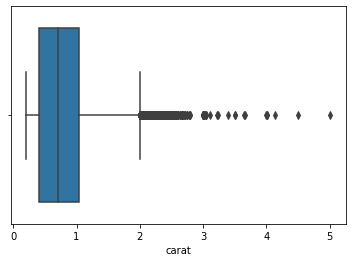

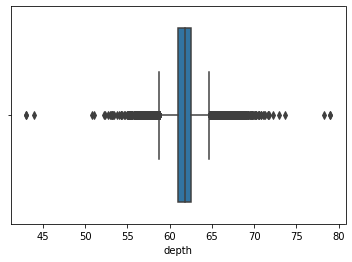

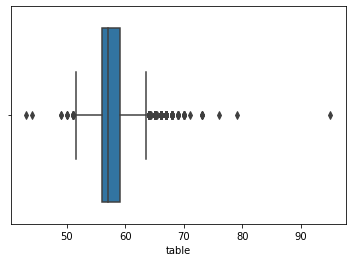

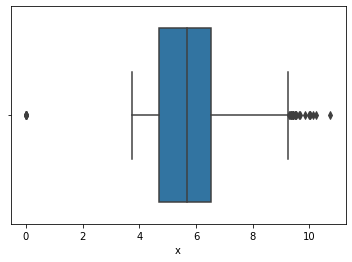

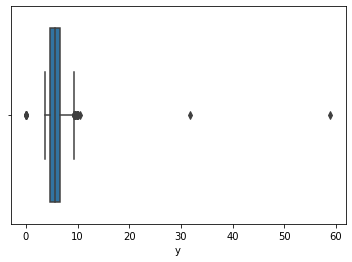

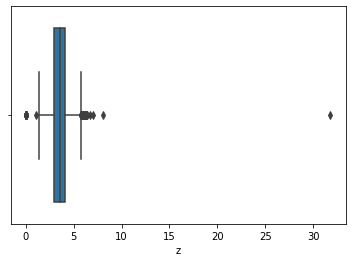

In [18]:
for col in numCols:
  sns.boxplot(data=df,x=col)
  plt.show()

In [19]:
Q1 = np.percentile(df["y"] , 25)
Q3 = np.percentile(df["y"] , 75)

IQR = Q3 - Q1
ul = Q3+1.5*IQR # up limit
ll = Q1-1.5*IQR # low limit

outliers = df[(df["y"] > ul) | (df["y"] < ll)]

In [20]:
outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
22831,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00


In [21]:
def outlier(dataframe,column):
  Q1 = np.percentile(dataframe[column] , 25)
  Q3 = np.percentile(dataframe[column] , 75)
  IQR = Q3 - Q1
  ul = Q3+1.5*IQR # up limit
  ll = Q1-1.5*IQR # low limit
  dataframe.loc[(dataframe[column] < ll), column] = ll
  dataframe.loc[(dataframe[column] > ul), column] = ul


In [22]:
for col in numCols:
  outlier(df,col)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.792558,0.457089,0.200,0.40,0.70,1.04,2.000
depth,53940.0,61.749156,1.270254,58.750,61.00,61.80,62.50,64.750
table,53940.0,57.438561,2.161139,51.500,56.00,57.00,59.00,63.500
price,53940.0,3932.799722,3989.439738,326.000,950.00,2401.00,5324.25,18823.000
x,53940.0,5.731285,1.119956,1.965,4.71,5.70,6.54,9.285
y,53940.0,5.733311,1.111950,1.990,4.72,5.71,6.54,9.270
z,53940.0,3.538500,0.692494,1.215,2.91,3.53,4.04,5.735


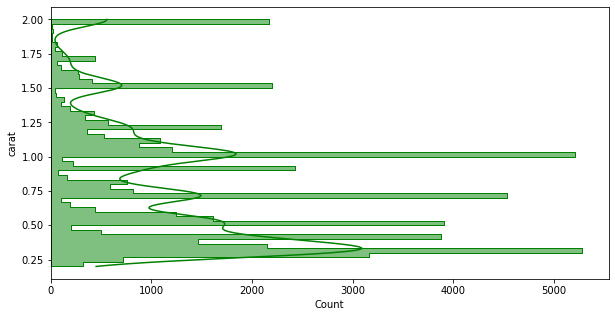

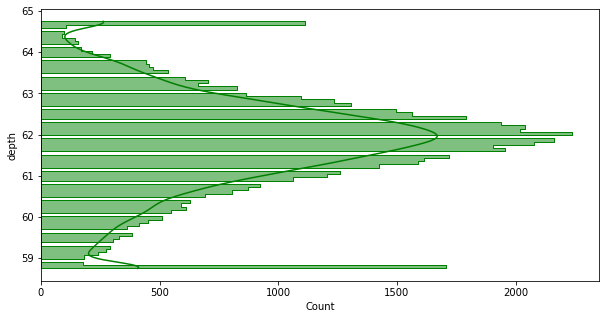

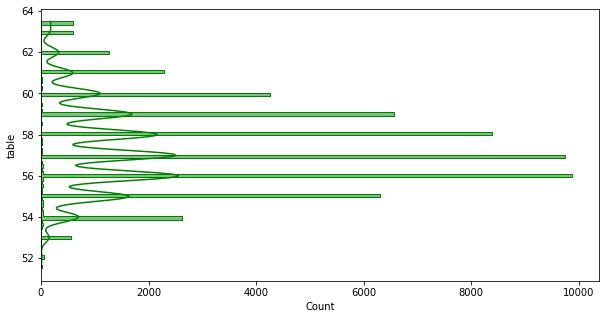

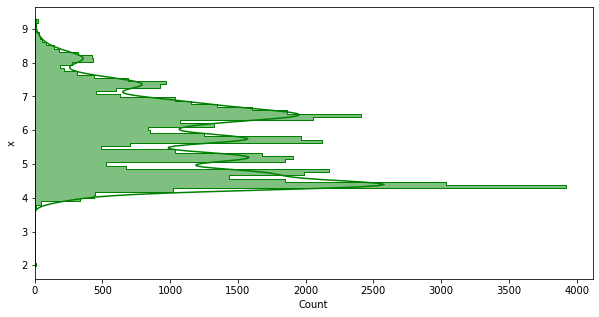

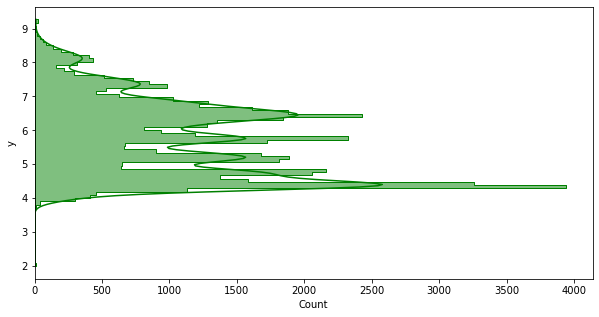

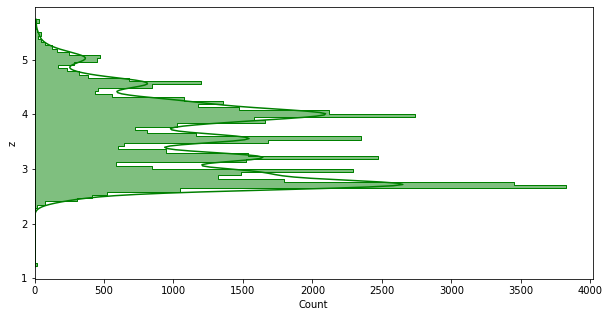

In [24]:
for col in numCols:
  plt.figure(figsize=(10,5))
  sns.histplot(data=df,y=col,element="step",kde=True,color="g")
  plt.show()

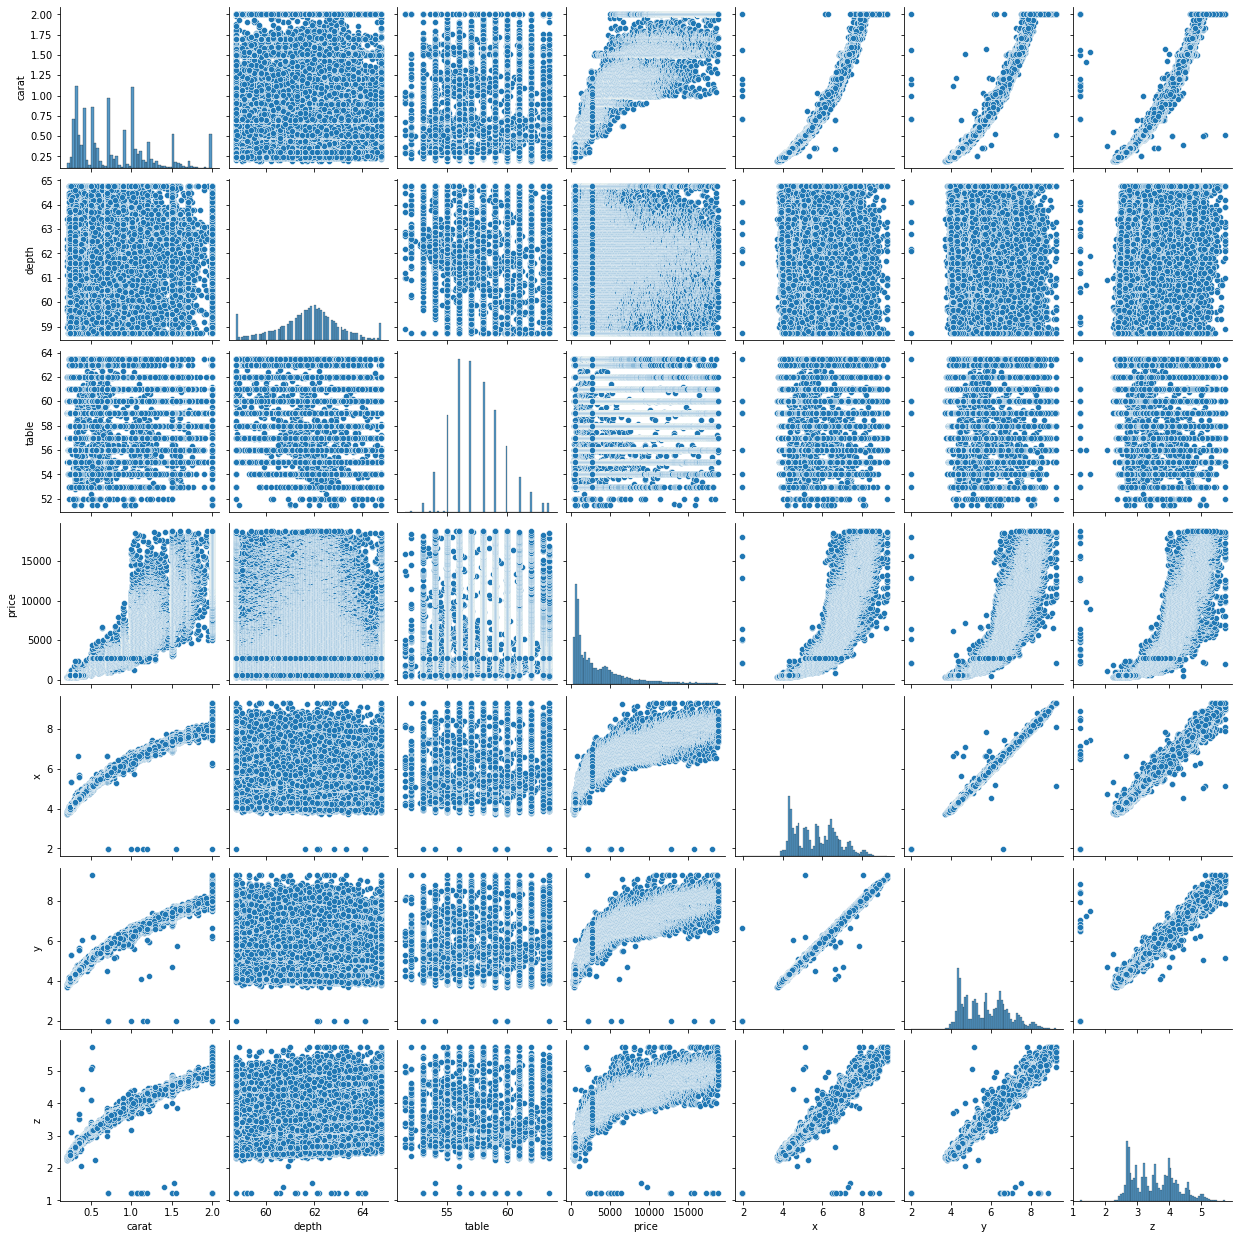

In [25]:
sns.pairplot(df)
plt.show()

### **Kategorik değişkenlerin analizi**

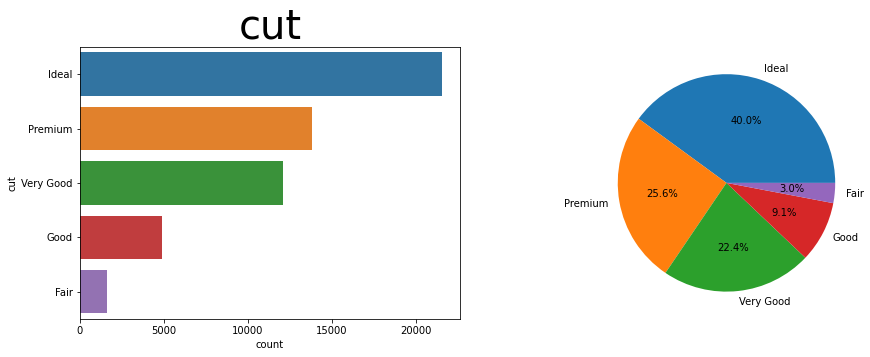

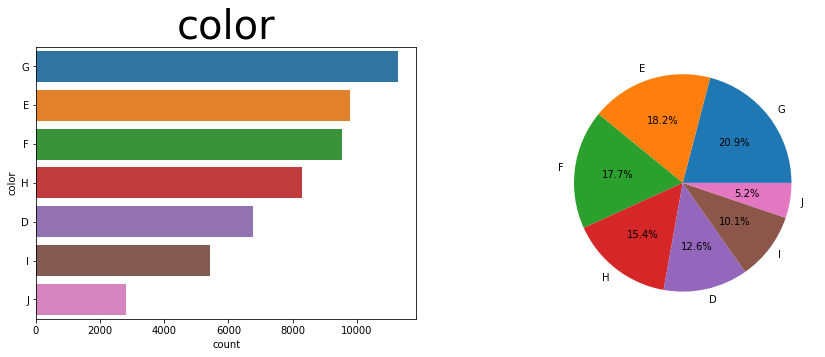

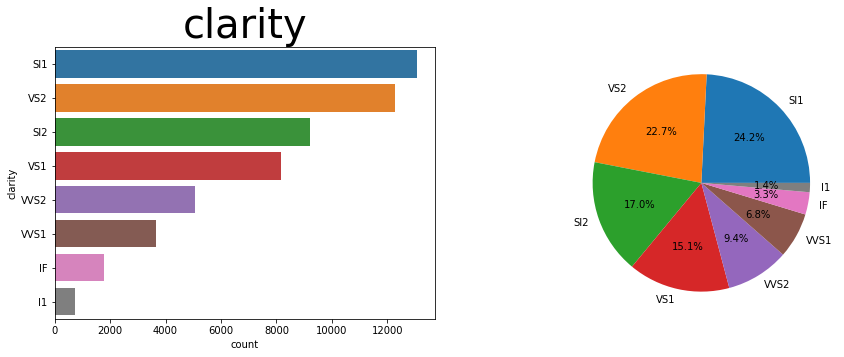

In [26]:
for col in catCols:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.countplot(data=df,y=col ,order = df[col].value_counts().index)
  plt.title(col,fontsize=40)
  plt.subplot(1,2,2)
  plt.pie(df[col].value_counts(),labels=df[col].value_counts().keys(),autopct='%1.1f%%')
  plt.show()

### **Korelasyon analizi**

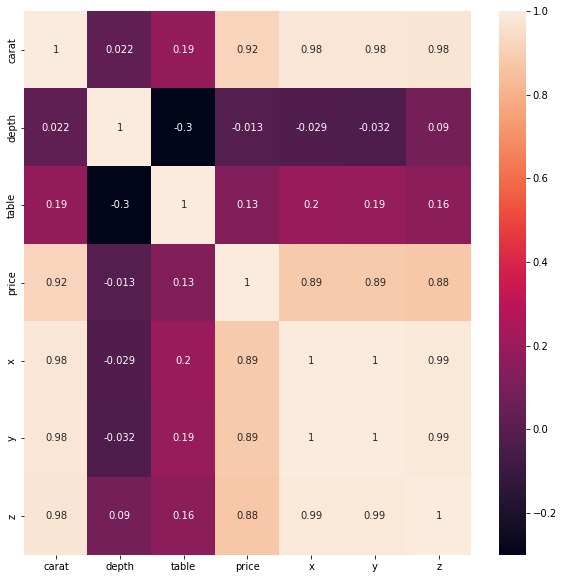

In [27]:
# kategorik değişkenleri encode ettikten sonra corr matrisi hesaplanması daha doğru

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### **Sorular**

In [28]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75


#### Elmasın ağırlığının ve berraklığının fiyat üzerinde etkisi nedir?

<Figure size 720x360 with 0 Axes>

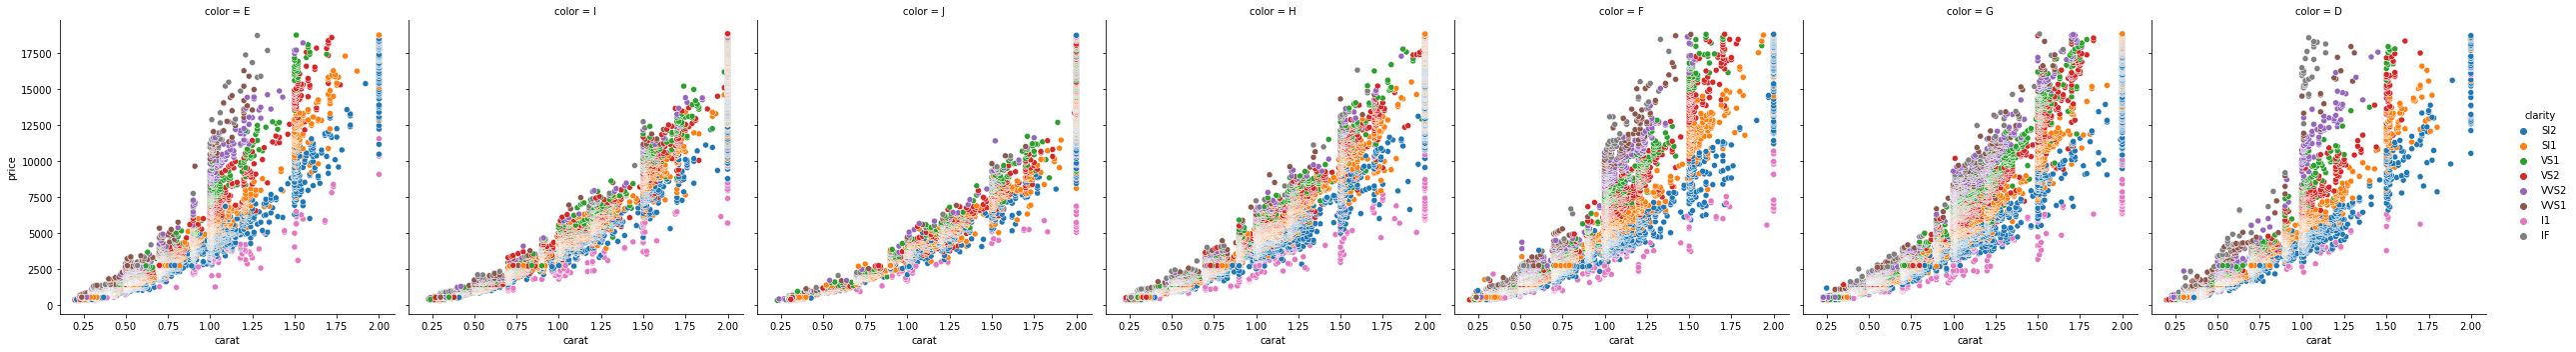

In [29]:
plt.figure(figsize=(10,5))
sns.relplot(
    data=df, x="carat", y="price",
    col="color", hue="clarity",
    kind="scatter"
)
plt.show()

#### Elmasların kesim kalitesinin fiyat üzerindeki etkisi nedir?

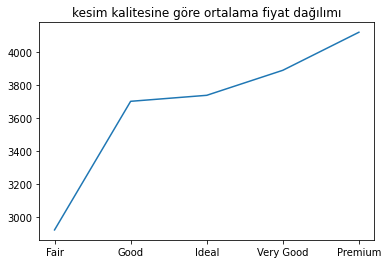

In [30]:
plt.plot(df[(df["z"]>3.5) & (df["z"]<4.0)].groupby("cut")["price"].mean().sort_values())
plt.title("kesim kalitesine göre ortalama fiyat dağılımı")
plt.show()

#### x, y, z değişkenlerinin ağırlığa etkisi nedir?

In [31]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75


In [32]:
df["new_xyz"]=df.x*df.y*df.z
df["new_xyz"]=df["new_xyz"].astype(int)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,new_xyz
0,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43,38
1,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31,34
2,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31,38
3,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63,46
4,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75,51


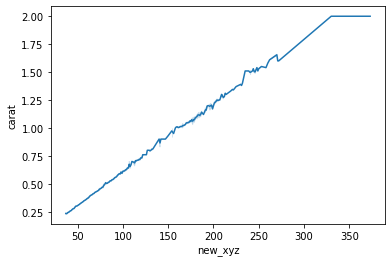

In [33]:
sns.lineplot(data=df[df["clarity"]=="IF"],x="new_xyz",y="carat")
plt.show()

#### Renk ve kesim arasında nasıl bir bağlantı vardır?

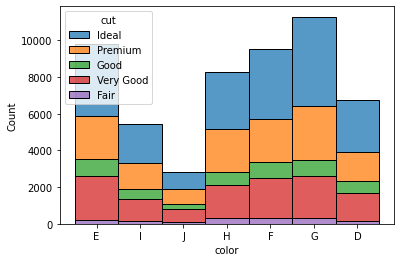

In [34]:
sns.histplot(data=df, x="color", hue="cut", multiple="stack")
plt.show()

## **Base Model**

In [35]:
base_df=data.copy()
base_df.drop("Unnamed: 0",axis=1,inplace=True)

In [36]:
base_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### **Encoding**

In [37]:
# yol 1 xxxxxx
# le = LabelEncoder()
# for col in catCols:
#     df[col] = le.fit_transform(df[col])

# yol 2 xxxx
# for i,v in enumerate(df["cut"]):
#   if (v=="fair"):
#     df["cut"][i]=1
#   elif (v=="Good"):
#     df["cut"][i]=2
#   elif (v=="Very Good"):
#     df["cut"][i]=3
#   elif (v=="Premium"):
#     df["cut"][i]=4
#   else:
#     df["cut"][i]=5

In [38]:
cutSinif = {"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5}
colorSinif = {"J" : 1, "I" : 2, "H" : 3, "G" : 4, "F" : 5, "E" : 6,"D" : 7} 
claritySinif = {"I1": 1, "SI2": 2, "SI1": 3, "VS1": 5, "VS2": 4, "VVS2": 6, "VVS1": 7, "IF": 8}
def encoder(dataframe):
  dataframe["cut"] = dataframe["cut"].map(cutSinif)
  dataframe["color"] = dataframe["color"].map(colorSinif)
  dataframe["clarity"] = dataframe["clarity"].map(claritySinif)

In [39]:
encoder(base_df)

In [40]:
base_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### **Modelleme**

In [41]:
y = base_df["price"]
X = base_df.drop(["price"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Linear regression

In [42]:
lr_model = LinearRegression().fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1224.5965418579538

#### Decision Tree

In [43]:
dt_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

730.9924618665435

#### Random Forest

In [44]:
rf_model = RandomForestRegressor(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

541.5690540931812

#### KNN (K-Nearest Neighbours)

In [45]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

838.3011977017711

## **Feature Engineering**

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,new_xyz
0,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43,38
1,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31,34
2,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31,38
3,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63,46
4,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75,51


In [47]:
encoder(df)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,new_xyz
0,0.23,5,6,2,61.50,55.0,326,3.95,3.98,2.43,38
1,0.21,4,6,3,59.80,61.0,326,3.89,3.84,2.31,34
2,0.23,2,6,5,58.75,63.5,327,4.05,4.07,2.31,38
3,0.29,4,2,4,62.40,58.0,334,4.20,4.23,2.63,46
4,0.31,2,1,2,63.30,58.0,335,4.34,4.35,2.75,51


**1 gr = 5 carat**

**v=m/d**

**d=3.515**

### **Kütle**

In [48]:
m=df.carat/5

df["new_m"]=m

### **Hacim**

In [49]:
v=m/3.515
v.mean()

0.045095741488224365

In [50]:
df["new_volume"]=v
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,new_xyz,new_m,new_volume
0,0.23,5,6,2,61.50,55.0,326,3.95,3.98,2.43,38,0.046,0.013087
1,0.21,4,6,3,59.80,61.0,326,3.89,3.84,2.31,34,0.042,0.011949
2,0.23,2,6,5,58.75,63.5,327,4.05,4.07,2.31,38,0.046,0.013087
3,0.29,4,2,4,62.40,58.0,334,4.20,4.23,2.63,46,0.058,0.016501
4,0.31,2,1,2,63.30,58.0,335,4.34,4.35,2.75,51,0.062,0.017639


## **Modelleme**

In [51]:
y = df["price"]
X = df.drop(["price"], axis=1)

scaler=StandardScaler()
X=scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Linear Regression

In [52]:
lr_model = LinearRegression().fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1127.3573794489434

### Decision tree

In [53]:
dt_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

725.8697192654452

### Random Forest

In [54]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

539.5721490313033

### KNN (K-Nearest Neighbours)

In [55]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

693.5534278925385

## **Model Tuning**

In [ ]:
lr_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### RF Tuning

In [ ]:
# rf_params={"max_depth":[2,8,None],
#           "max_features":[2,5,"Auto"],
#           "n_estimators":[100,500],
#           "min_samples_split":[2,5]}


# rf_model=RandomForestRegressor(random_state=42)
# rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   4.6s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=500; total time=   4.5s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=2, max_features=2, min_samples_split=5, n_estimators=1

In [ ]:
# rf_cv_model.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
# rf_model = RandomForestRegressor(random_state=42,max_depth=None,max_features=5,min_samples_split=5,n_estimators=500).fit(X_train, y_train)
# y_pred = rf_model.predict(X_test)
# np.sqrt(mean_squared_error(y_test, y_pred))

535.824829305815


[CV] END max_depth=8, max_features=Auto, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=Auto, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=Auto, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=2, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, max_features=2, min_samples_split=2, n_estimators=100; total time=   5.8s
[CV] END max_depth=None, max_features=2, min_samples_split=2, n_estimators=100; total time=   5.4s
[CV] END max_depth=None, max_features=2, min_samples_split=2, n_estimators=100; total time=   5.7s
[CV] END max_depth=None, max_features=2, min_samples_split=2, n_estimators=500; total time=  28.3s
[CV] END max_depth=None, max_features=2, min_samples_split=2, n_estimators=500; total time=  28.0s
[CV] END max_depth=None, max_features=2, min_samples_split=2, n_estimators=500; total time=  27.8s
[CV] END 